In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import re

In [4]:
import seaborn as sns

In [5]:
gl=pd.read_csv("glassdoor_jobs.csv")

In [6]:
gl.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [7]:
gl.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


## Data Cleaning

## cleaning salary Estimate 

## before cleaning
- why i am converting salary estimate means it is on interval type it is not good for analyzing
- to analyze in an efiicient way i converted it into average of two values

In [9]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [10]:
import re
sal=[]
for i in gl['Salary Estimate']:
    num = re.findall(r'\d+', i)
    
    # Convert the extracted strings to integers
    if len(num)==2:
        n1=int(num[0])
        n2=int(num[1])
        me=(n1+n2)/2
        sal.append(me)
    else:
        sal.append(i)
    


In [11]:
gl['Salary Estimate']=sal

## after cleaning

In [12]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


## size column cleaning

### before cleaning
- why i am converting salary estimate means it is on interval type it is not good for analyzing
- to analyze in an efiicient way i converted it into average of two values

In [13]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [14]:
siz=[]
for i in gl['Size']:
    nu=re.findall(r'\d+',i)
    if len(nu)==2:
        n1=int(nu[0])
        n2=int(nu[1])
        me=(n1+n2)/2
        siz.append(me)
    elif len(nu)==1:
        siz.append(int(nu[0]))
    else:
        siz.append(-1)

In [15]:
gl['Size']=siz

### cleaning compan name

In [16]:
a=gl['Company Name']

In [17]:
j=[]
for i in a:
    i=i[:-4]
    j.append(i)

In [18]:
gl['Company Name']=j

### after cleaning

In [19]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


### cleaning revenue column

### before cleaning

In [20]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


In [21]:
a=gl['Revenue'].value_counts()
a

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [22]:
l=[]
for i in gl['Revenue']:
    i=i.lower()
    if i.find("million")!=-1:
        l.append("million")
    elif i.find("billion")!=-1:
        l.append("billion")
    elif (i.find("billion") and i.find("million"))!=-1:
        l.append("million")
    else:
        l.append("-1")
    
        

In [23]:
gl['Revenue_']=l

In [24]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,million
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,billion


In [25]:
len(gl['Job Title'].value_counts())

328

In [26]:
rev=[]
for i in gl['Revenue']:
    n=re.findall(r'\d+',i)
    if len(n)==2 and 'million' in i:
        n1=int(n[0])*1e6
        n2=int(n[1])*1e6
        mean=(n1+n2)/2
        rev.append(mean)
    elif len(n)==2 and 'billion' in i:
        n1=int(n[0])*1e9
        n2=int(n[1])*1e9
        mean=(n1+n2)/2
        rev.append(mean)
    elif len(n)==2 and ('million' and 'billion' in i):
        n1=int(n[0])*1e6
        n2=int(n[1])*1e9
        mean=(n1+n2)/2
        rev.append(mean)
    elif len(n)==1 and ('million' in i):
        n1=int(n[0])*1e6
        rev.append(n1)
    elif len(n)==1 and ('billion' in i):
        n1=int(n[0])*1e9
        rev.append(n1)
    else:
        rev.append(0)

In [27]:
gl['Revenue']=rev

In [28]:
gl.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,-1,million
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,-1,billion
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,3.000000e+08,-1,million
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities",2.505000e+08,"Oak Ridge National Laboratory, National Renewa...",million
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,0.000000e+00,"Commerce Signals, Cardlytics, Yodlee",-1


In [29]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    float64
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    float64
 13  Competitors        956 non-null    object 
 14  Revenue_           956 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 112.2+ KB


In [30]:
gl.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Revenue_             0
dtype: int64

### filling null values

In [31]:
len(gl[gl['Salary Estimate']=='-1'])

214

In [32]:
gl.shape

(956, 15)

In [33]:
gl['Salary Estimate'] = gl['Salary Estimate'].astype(float)


## filling null values in salary estimate
- using median

In [34]:
med=gl['Salary Estimate'].median()

In [35]:
med

84.5

In [36]:
con=gl['Salary Estimate']==-1
tr=med
fa=gl['Salary Estimate']
l=np.where(con,tr,fa)

In [37]:
gl['new_sal']=l

In [38]:
len(gl[gl['Salary Estimate']=='-1'])

0

## filling null values in size column
- using median

In [39]:
con=gl['Size']==-1
tr=gl['Size'].median()
fa=gl['Size']
l=np.where(con,tr,fa)

In [40]:
gl['Size']=l

In [41]:
gl[gl['Size']==-1]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal


## filling null values in revenue column
- using median

In [42]:
con=gl['Revenue']==0
tr=gl['Revenue'].median()
fa=gl['Revenue']
l=np.where(con,tr,fa)

In [43]:
gl['Revenue']=l

In [44]:
len(gl[gl['Revenue']==-1])

0

### cleaning job title

In [45]:
l=gl['Job Title'].value_counts()

In [46]:

data=gl['Job Title'].value_counts()
ke=data.keys()
va=data.values
df1=pd.DataFrame(zip(ke,va),columns=['role','count'])

In [47]:
df1.to_csv("job_role.csv")

In [48]:
jtitle=[]
for i in gl['Job Title']:
    i=i.lower()
    if i.find('scientist')!=-1 or i.find("science")!=-1:
        jtitle.append("data scientist")
    elif i.find('data manager')!=-1 or i.find('analyst')!=-1 or i.find('visualization')!=-1:
        jtitle.append('data analyst')
    elif i.find('engineer')!=-1:
        jtitle.append('data engineer')
    elif i.find('manager')!=-1 or i.find('director')!=-1:
        jtitle.append('manager')
    elif i.find('consultant')!=-1:
        jtitle.append('consultant')
    else:
        jtitle.append('officers')

In [49]:
gl['domain']=jtitle

In [50]:
gl[['domain']]

,domain
0,data scientist
1,data scientist
2,data scientist
3,data scientist
4,data scientist
...,...
951,data engineer
952,data scientist
953,data scientist
954,data engineer


## cleaning null values in rating column
- filling with median

In [51]:
len(gl[gl['Rating']==-1])

34

In [52]:
con=gl['Rating']==-1
tr=gl['Rating'].median()
fa=gl['Rating']
l=np.where(con,tr,fa)

In [53]:
gl['Rating']=l

In [54]:
gl.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,-1,million,72.0,data scientist
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,-1,billion,87.5,data scientist


## cleaning null values  in ownership
- filling null values with  mode because it is categorical column

In [55]:
gl['Type of ownership'].value_counts()


Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [56]:
con=gl['Type of ownership']=='-1'
tr=gl['Type of ownership'].mode()[0]
fa=gl['Type of ownership']
l=np.where(con,tr,fa)

In [57]:
gl['Type of ownership']=l

In [58]:
gl['Type of ownership'].value_counts()

Type of ownership
Company - Private                 543
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

## cleaning the null values in industry column
- filling null values with mode

In [59]:
gl[gl['Industry']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
43,Data Engineer,98.5,Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia,"Marlborough, MA","Lowell, MA",25.5,-1,Company - Private,-1,-1,1000000.0,-1,million,98.5,data engineer
114,Data Scientist,-1.0,Company Description\n\nFounded in Silicon Vall...,3.8,Bridgerock,"Gainesville, FL","Gainesville, FL",25.5,-1,Unknown,-1,-1,75000000.0,-1,-1,84.5,data scientist
121,Postdoc Scientist - T cell engineering,-1.0,Postdoctoral Scientist – CAR-T cell engineerin...,3.8,LEAH,"Rochester, MN","Rochester, MN",25.5,-1,Unknown,-1,-1,75000000.0,-1,-1,84.5,data scientist
149,Senior Data Scientist,-1.0,Our Mission\n\nWe make it fly! Join us and bui...,3.6,My Job Tank,"San Francisco, CA","New York, NY",125.5,-1,Company - Private,-1,-1,75000000.0,-1,-1,84.5,data scientist
214,Data Scientist,-1.0,With one application you can be considered for...,3.8,Seen by In,"Pittsburgh, PA","Austin, TX",750.5,-1,Company - Private,-1,-1,75000000.0,-1,-1,84.5,data scientist
238,Data Science Manager,-1.0,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.8,Deco,"New York, NY","New York, NY",25.5,-1,Unknown,-1,-1,75000000.0,-1,-1,84.5,data scientist
283,Environmental Scientist,-1.0,JOB SUMMARY:\nThe Environmental Scientist will...,2.4,Calista,"Anchorage, AK","Anchorage, AK",3000.5,-1,Other Organization,-1,-1,300000000.0,-1,million,84.5,data scientist
345,Data Scientist,-1.0,With one application you can be considered for...,3.8,Seen by In,"Pittsburgh, PA","Austin, TX",750.5,-1,Company - Private,-1,-1,75000000.0,-1,-1,84.5,data scientist
377,Data Operations Lead,87.5,Data Operations Lead\nLocation: Flexible thoug...,3.8,,"San Francisco, CA","San Francisco, CA",350.5,-1,Nonprofit Organization,-1,-1,75000000.0,-1,-1,87.5,officers
405,Scientist – Cancer Drug Discovery,-1.0,Scientist – Cancer Drug Discovery\nLocation: C...,3.8,Monte Rosa Therapeu,"Cambridge, MA",-1,1.0,-1,Company - Private,-1,-1,75000000.0,-1,-1,84.5,data scientist


In [60]:
con=gl['Industry']=='-1'
tr=gl['Industry'].mode()[0]
fa=gl['Industry']
l=np.where(con,tr,fa)

In [61]:
gl['Industry']=l

In [62]:
gl[gl['Industry']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain


### filling null values in sector column
- filling with mode

In [63]:
gl[gl['Sector']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
43,Data Engineer,98.5,Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia,"Marlborough, MA","Lowell, MA",25.5,-1,Company - Private,Biotech & Pharmaceuticals,-1,1000000.0,-1,million,98.5,data engineer
114,Data Scientist,-1.0,Company Description\n\nFounded in Silicon Vall...,3.8,Bridgerock,"Gainesville, FL","Gainesville, FL",25.5,-1,Unknown,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
121,Postdoc Scientist - T cell engineering,-1.0,Postdoctoral Scientist – CAR-T cell engineerin...,3.8,LEAH,"Rochester, MN","Rochester, MN",25.5,-1,Unknown,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
149,Senior Data Scientist,-1.0,Our Mission\n\nWe make it fly! Join us and bui...,3.6,My Job Tank,"San Francisco, CA","New York, NY",125.5,-1,Company - Private,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
214,Data Scientist,-1.0,With one application you can be considered for...,3.8,Seen by In,"Pittsburgh, PA","Austin, TX",750.5,-1,Company - Private,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
238,Data Science Manager,-1.0,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,3.8,Deco,"New York, NY","New York, NY",25.5,-1,Unknown,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
283,Environmental Scientist,-1.0,JOB SUMMARY:\nThe Environmental Scientist will...,2.4,Calista,"Anchorage, AK","Anchorage, AK",3000.5,-1,Other Organization,Biotech & Pharmaceuticals,-1,300000000.0,-1,million,84.5,data scientist
345,Data Scientist,-1.0,With one application you can be considered for...,3.8,Seen by In,"Pittsburgh, PA","Austin, TX",750.5,-1,Company - Private,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist
377,Data Operations Lead,87.5,Data Operations Lead\nLocation: Flexible thoug...,3.8,,"San Francisco, CA","San Francisco, CA",350.5,-1,Nonprofit Organization,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,87.5,officers
405,Scientist – Cancer Drug Discovery,-1.0,Scientist – Cancer Drug Discovery\nLocation: C...,3.8,Monte Rosa Therapeu,"Cambridge, MA",-1,1.0,-1,Company - Private,Biotech & Pharmaceuticals,-1,75000000.0,-1,-1,84.5,data scientist


In [64]:
con=gl['Sector']=='-1'
tr=gl['Sector'].mode()[0]
fa=gl['Sector']
l=np.where(con,tr,fa)

In [65]:
gl['Sector']=l

In [66]:
gl[gl['Sector']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain


## cleaning Revenue_ null values
- filling with mode

In [67]:
gl[gl['Revenue_']=='-1'].head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,75000000.0,"Commerce Signals, Cardlytics, Yodlee",-1,114.5,data scientist
6,Data Scientist,73.5,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,"Baltimore, MD","Baltimore, MD",750.5,2008,Company - Private,Banks & Credit Unions,Finance,75000000.0,-1,-1,73.5,data scientist
13,Data Analyst,65.5,"Are you an experienced Data Analyst, skilled a...",4.1,Yesler,"Seattle, WA","Seattle, WA",350.5,2012,Company - Private,Advertising & Marketing,Business Services,75000000.0,-1,-1,65.5,data analyst
15,Data Engineer I,146.0,This opportunity is within Audibles Data Engin...,3.6,Audible,"Newark, NJ","Newark, NJ",3000.5,1995,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,75000000.0,-1,-1,146.0,data engineer
17,Customer Data Scientist,153.5,Company Overview\n\nH2O.ai is the open source ...,4.3,h2o.ai,"Mountain View, CA","Mountain View, CA",350.5,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,75000000.0,-1,-1,153.5,data scientist


In [68]:
con=gl['Revenue_']=='-1'
tr=gl['Revenue_'].mode()[0]
fa=gl['Revenue_']
l=np.where(con,tr,fa)

In [69]:
gl['Revenue_']=l

In [70]:
gl[gl['Revenue']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain


In [71]:
gl.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,-1,million,72.0,data scientist
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,-1,billion,87.5,data scientist
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,3.000000e+08,-1,million,85.0,data scientist
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities",2.505000e+08,"Oak Ridge National Laboratory, National Renewa...",million,76.5,data scientist
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,7.500000e+07,"Commerce Signals, Cardlytics, Yodlee",million,114.5,data scientist


In [72]:
competitors=[[] for i in range(0,24)]

In [73]:


sector_groups = gl.groupby('Sector')['Company Name'].apply(list).reset_index()

sector_groups['Competitors'] = sector_groups['Company Name'].apply(
    lambda companies: [comp for comp in companies if comp != companies[0]]
)


competitors_dict = sector_groups.set_index('Sector')['Competitors'].to_dict()


gl['Competitors'] = gl.apply(
    lambda row: [comp for comp in competitors_dict.get(row['Sector'], []) if comp != row['Company Name']],
    axis=1
)






In [74]:
gl[gl['Sector']=='Transportation & Logistics']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
22,Data Scientist - Quantitative,112.5,Truckstop.com is hiring a Data Scientist for o...,3.8,Truckstop.com,"Chicago, IL","New Plymouth, ID",750.5,1995,Company - Private,Logistics & Supply Chain,Transportation & Logistics,7.500000e+07,"[SMC 3, Echo Global Logistics, Dayton Freight ...",million,112.5,data scientist
23,Data Scientist,84.0,Position Summary\nOur Data Science team is cur...,4.3,SMC 3,"Louisville, KY","Peachtree City, GA",125.5,1935,Nonprofit Organization,Logistics & Supply Chain,Transportation & Logistics,1.750000e+07,"[Echo Global Logistics, Dayton Freight Lines, ...",million,84.0,data scientist
251,Sr. Data Engineer,107.5,Position Purpose\n\nAs a Senior Data Engineer ...,3.4,Echo Global Logistics,"Chicago, IL","Chicago, IL",3000.5,2005,Company - Public,Transportation Management,Transportation & Logistics,3.500000e+09,"[SMC 3, Dayton Freight Lines, Inc., SMC 3]",billion,107.5,data engineer
253,Data Scientist - Quantitative,112.5,Truckstop.com is hiring a Data Scientist for o...,3.8,Truckstop.com,"Chicago, IL","New Plymouth, ID",750.5,1995,Company - Private,Logistics & Supply Chain,Transportation & Logistics,7.500000e+07,"[SMC 3, Echo Global Logistics, Dayton Freight ...",million,112.5,data scientist
266,Business Intelligence Analyst / Developer,79.0,As a a Business Intelligence Analyst/Developer...,4.3,"Dayton Freight Lines, Inc.","Dayton, OH","Dayton, OH",3000.5,1981,Company - Private,Trucking,Transportation & Logistics,7.500000e+07,"[SMC 3, Echo Global Logistics, SMC 3, Echo Glo...",million,79.0,data analyst
285,Data Scientist,84.0,Position Summary\nOur Data Science team is cur...,4.3,SMC 3,"Louisville, KY","Peachtree City, GA",125.5,1935,Nonprofit Organization,Logistics & Supply Chain,Transportation & Logistics,1.750000e+07,"[Echo Global Logistics, Dayton Freight Lines, ...",million,84.0,data scientist
502,Sr. Data Engineer,107.5,Position Purpose\n\nAs a Senior Data Engineer ...,3.4,Echo Global Logistics,"Chicago, IL","Chicago, IL",3000.5,2005,Company - Public,Transportation Management,Transportation & Logistics,3.500000e+09,"[SMC 3, Dayton Freight Lines, Inc., SMC 3]",billion,107.5,data engineer
753,Sr. Data Engineer,107.5,Position Purpose\n\nAs a Senior Data Engineer ...,3.4,Echo Global Logistics,"Chicago, IL","Chicago, IL",3000.5,2005,Company - Public,Transportation Management,Transportation & Logistics,3.500000e+09,"[SMC 3, Dayton Freight Lines, Inc., SMC 3]",billion,107.5,data engineer


In [75]:
gl.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_,new_sal,domain
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,"[Systems & Technology Research, Centauri, Torc...",million,72.0,data scientist
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,"[Rochester Regional Health, Nurx, Boys Town Ho...",billion,87.5,data scientist
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,3.000000e+08,"[Affinity Solutions, Logic20/20, ManTech, Yesl...",million,85.0,data scientist
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities",2.505000e+08,"[Pacific Northwest National Laboratory, Associ...",million,76.5,data scientist
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,7.500000e+07,"[Logic20/20, ManTech, Yesler, Anson McCade, Zi...",million,114.5,data scientist


In [76]:
gl.drop(['Job Title','Job Description'],axis=1,inplace=True)

In [77]:
l=gl['domain']
gl.drop(['domain'],axis=1,inplace=True)
gl.insert(0,'domain',l)

In [78]:
gl.drop(['new_sal'],axis=1,inplace=True)

In [79]:
gl.to_csv('after_clean_glassdoor.csv',index=False)

# Data Analysis

In [80]:
gll=pd.read_csv("after_clean_glassdoor.csv")

In [81]:
gll.head()

,domain,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_
0,data scientist,72.0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,"['Systems & Technology Research', 'Centauri', ...",million
1,data scientist,87.5,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,"['Rochester Regional Health', 'Nurx', 'Boys To...",billion
2,data scientist,85.0,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,3.000000e+08,"['Affinity Solutions', 'Logic20/20', 'ManTech'...",million
3,data scientist,76.5,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities",2.505000e+08,"['Pacific Northwest National Laboratory', 'Ass...",million
4,data scientist,114.5,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,7.500000e+07,"['Logic20/20', 'ManTech', 'Yesler', 'Anson McC...",million


In [82]:
gl.shape

(956, 14)

In [83]:
gl.columns

Index(['domain', 'Salary Estimate', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Revenue_'],
      dtype='object')

In [84]:
gl.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   domain             956 non-null    object 
 1   Salary Estimate    956 non-null    float64
 2   Rating             956 non-null    float64
 3   Company Name       956 non-null    object 
 4   Location           956 non-null    object 
 5   Headquarters       956 non-null    object 
 6   Size               956 non-null    float64
 7   Founded            956 non-null    int64  
 8   Type of ownership  956 non-null    object 
 9   Industry           956 non-null    object 
 10  Sector             956 non-null    object 
 11  Revenue            956 non-null    float64
 12  Competitors        956 non-null    object 
 13  Revenue_           956 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 104.7+ KB


In [85]:
gll.rename(columns={'Salary Estimate': 'salary'}, inplace=True)

In [86]:
gll['salary']=gll['salary']*1000

In [87]:
gll.drop(['Industry'],axis=1,inplace=True)

In [88]:
gll.head()

,domain,salary,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,Competitors,Revenue_
0,data scientist,72000.0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,7.500000e+07,"['Systems & Technology Research', 'Centauri', ...",million
1,data scientist,87500.0,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care,3.500000e+09,"['Rochester Regional Health', 'Nurx', 'Boys To...",billion
2,data scientist,85000.0,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Business Services,3.000000e+08,"['Affinity Solutions', 'Logic20/20', 'ManTech'...",million
3,data scientist,76500.0,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,"Oil, Gas, Energy & Utilities",2.505000e+08,"['Pacific Northwest National Laboratory', 'Ass...",million
4,data scientist,114500.0,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Business Services,7.500000e+07,"['Logic20/20', 'ManTech', 'Yesler', 'Anson McC...",million


In [89]:
gll['Size']=gll['Size'].astype('object')
gll['Founded']=gll['Founded'].astype('object')

In [90]:
catcol=['domain','Type of ownership','Sector','Revenue_','Size']

In [91]:
numcol=gll.select_dtypes(exclude='object').columns

In [92]:
import warnings
warnings.filterwarnings("ignore")

## plotting categorical columns

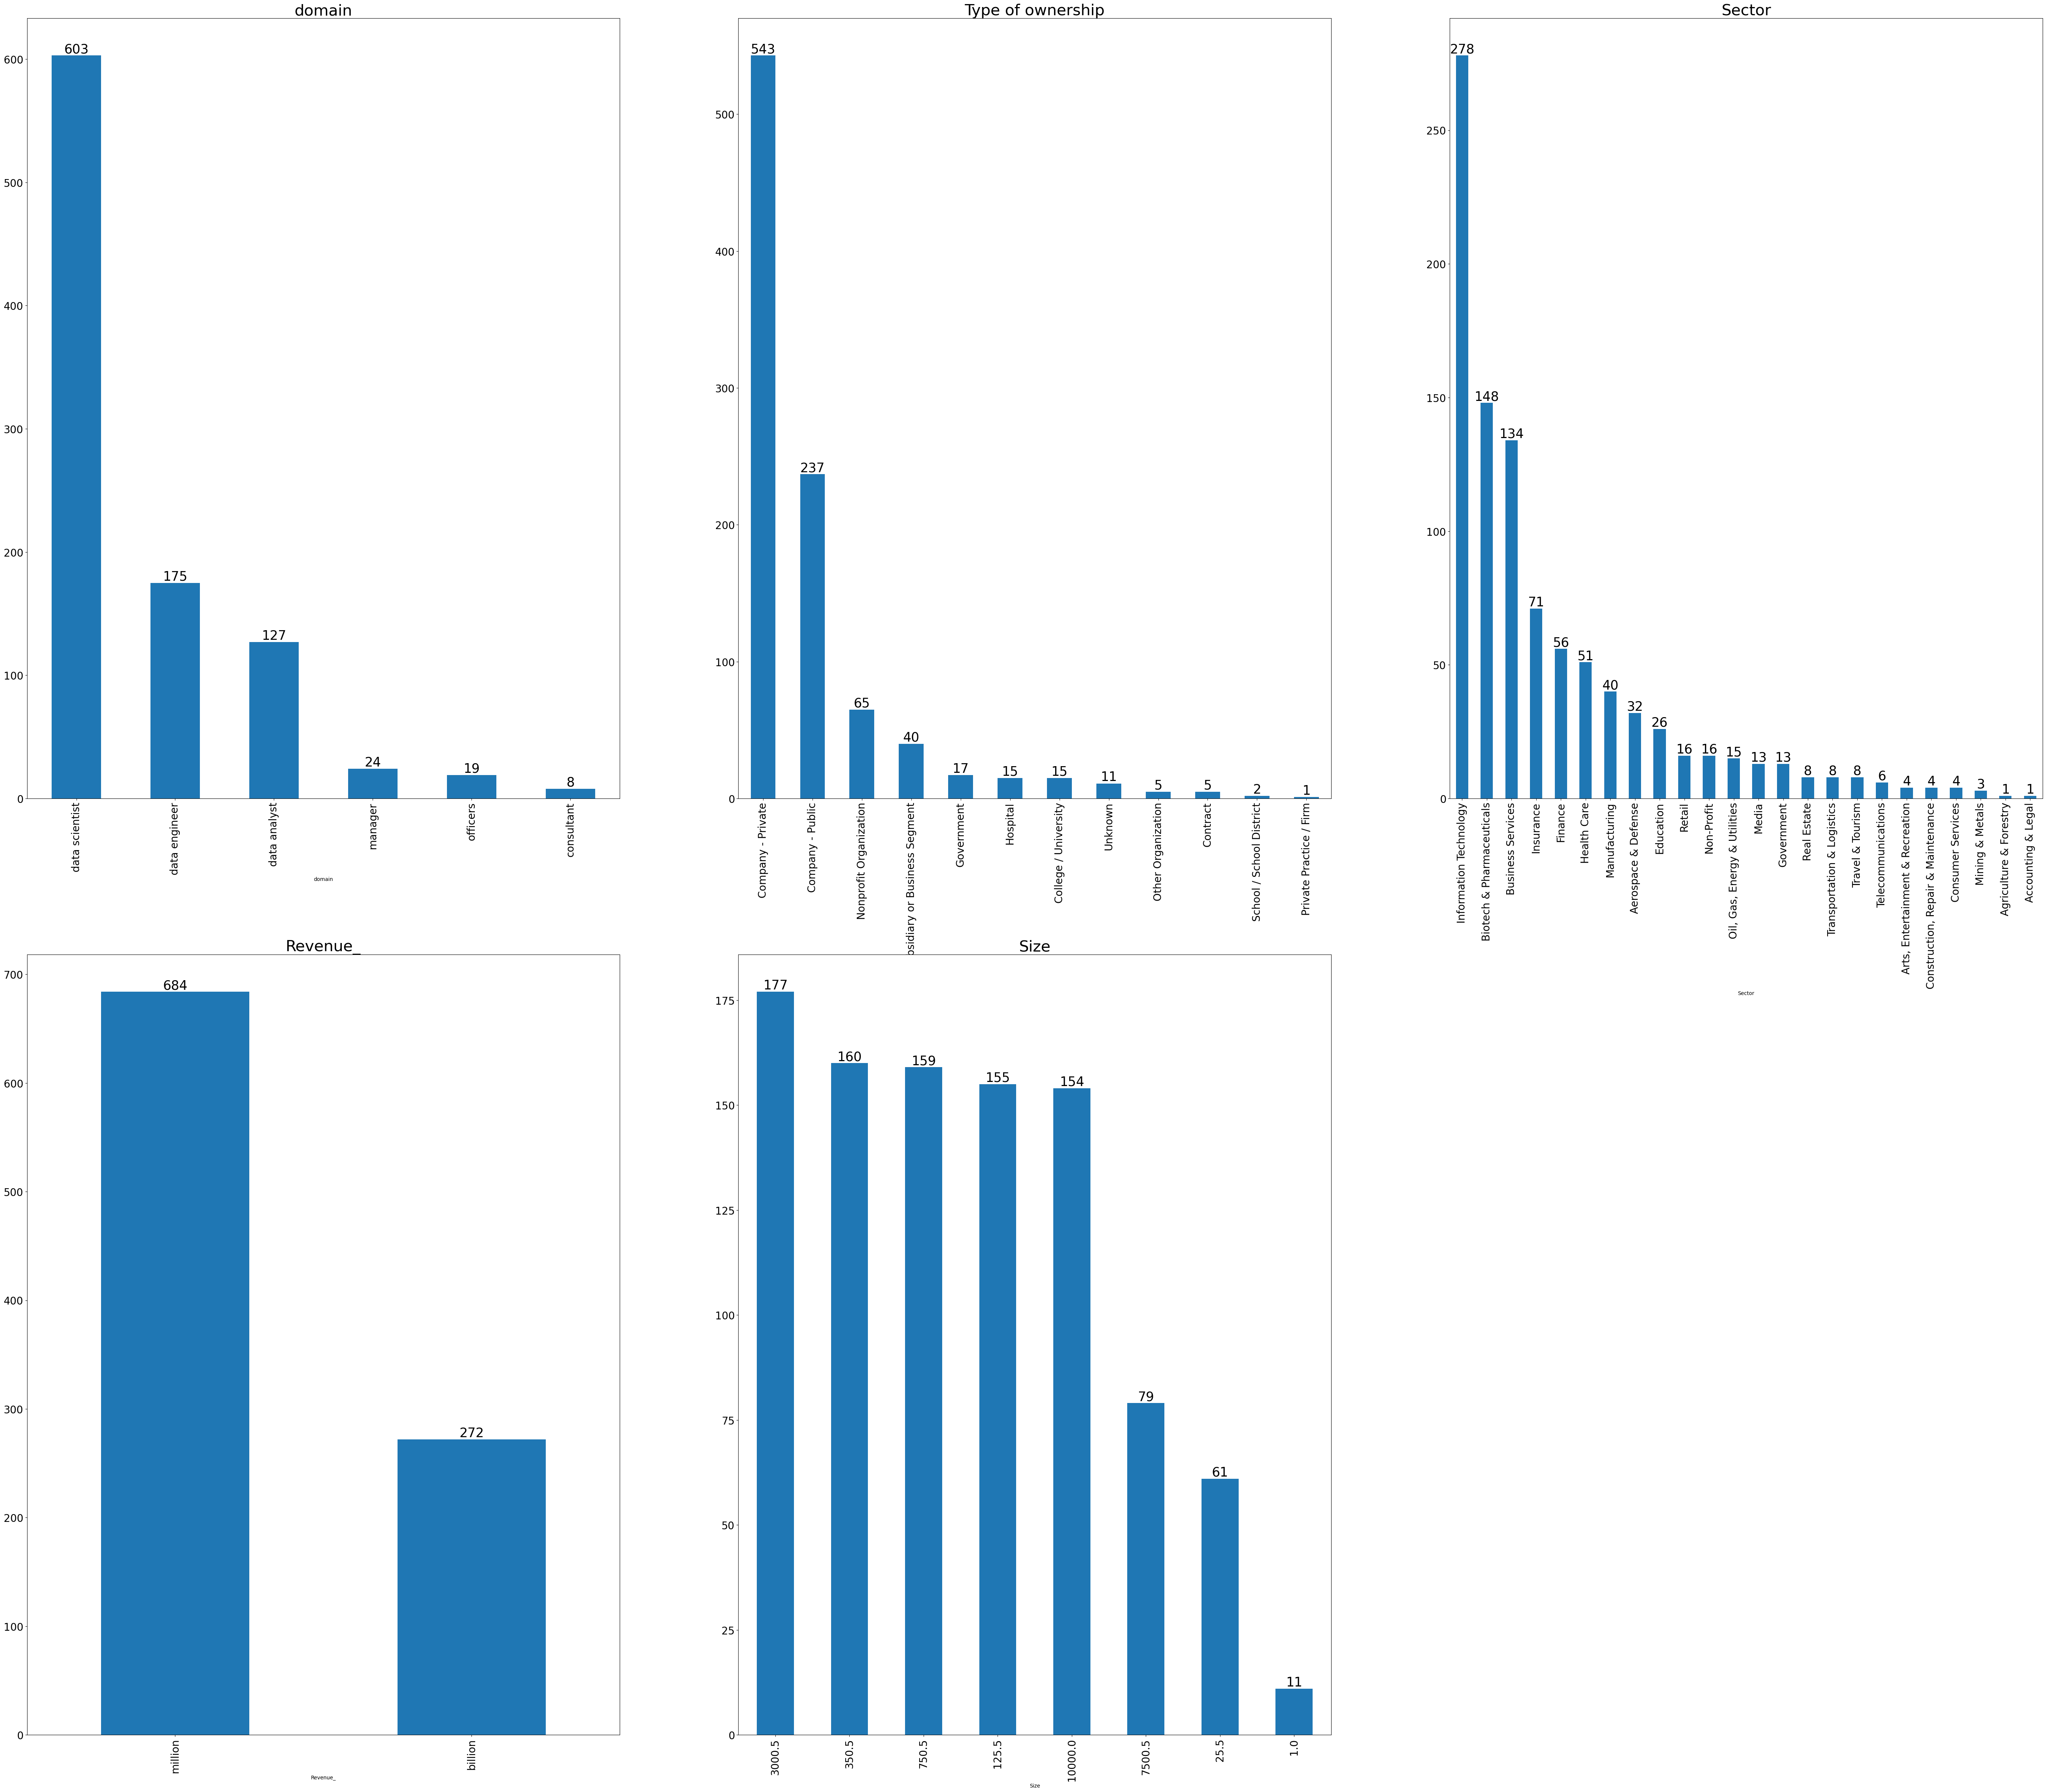

In [93]:
j=1
plt.figure(figsize=(70,60))
for i in catcol:
    data=gll[i].value_counts()
    plt.subplot(2,3,j)
    ax=data.plot(kind='bar')
    plt.title(i,fontsize=30)
    j+=1
    ax.bar_label(ax.containers[0],fontsize=25)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
plt.show()

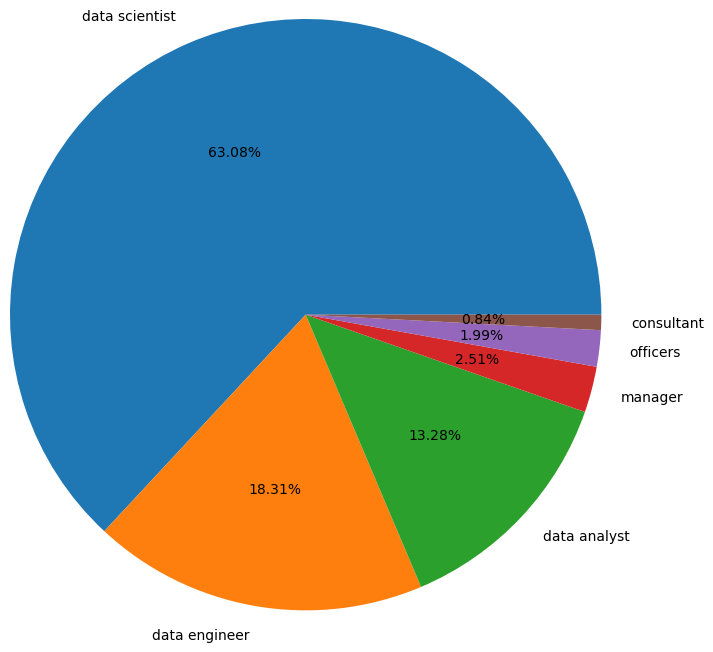

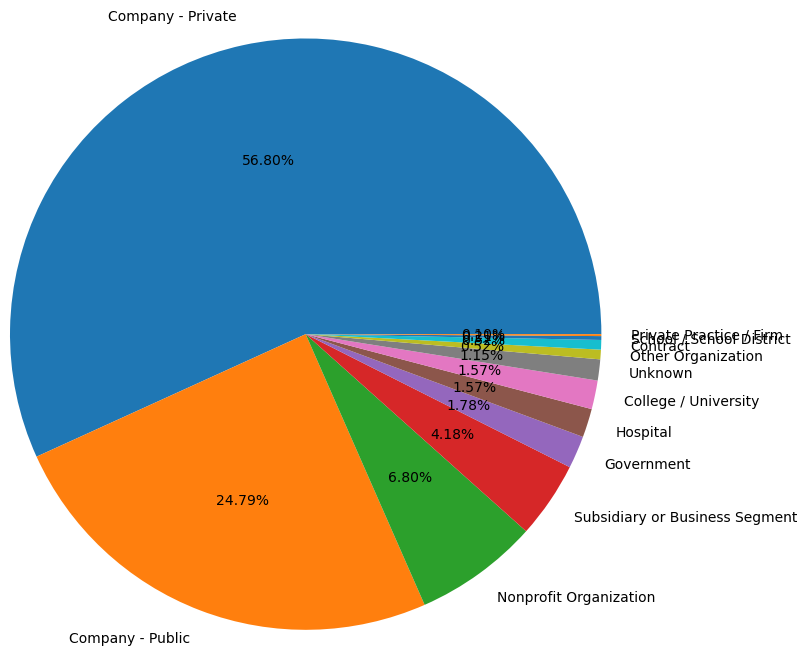

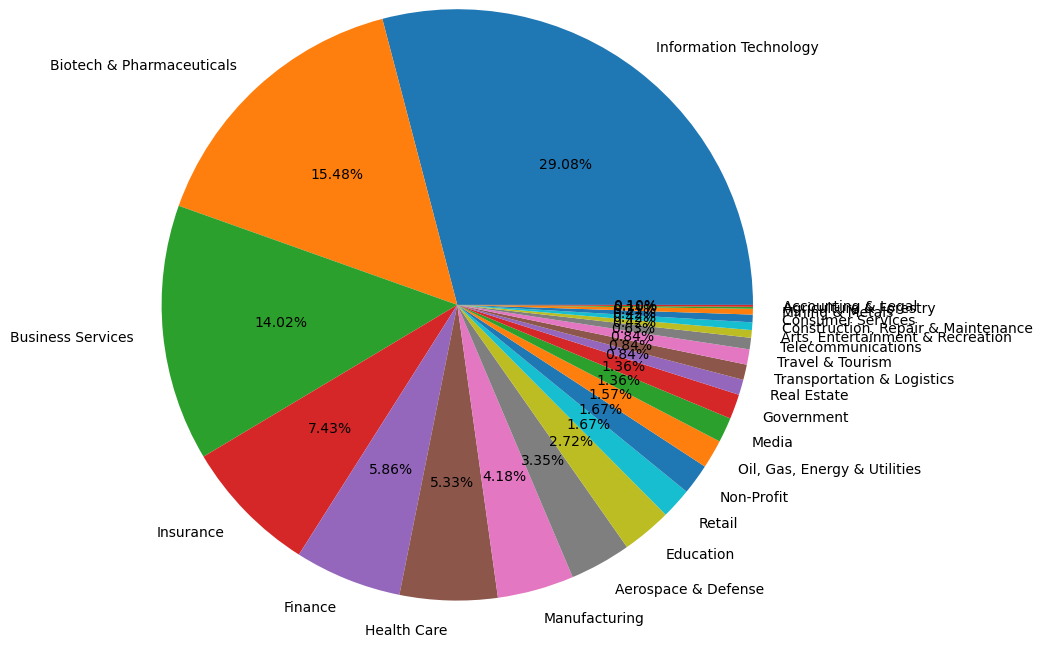

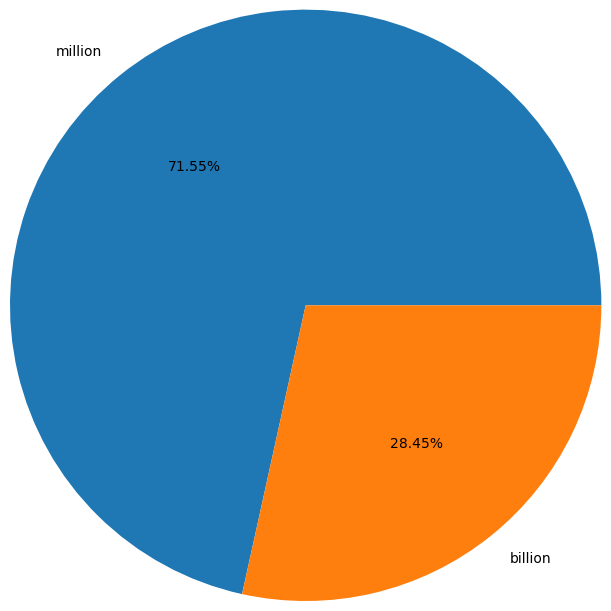

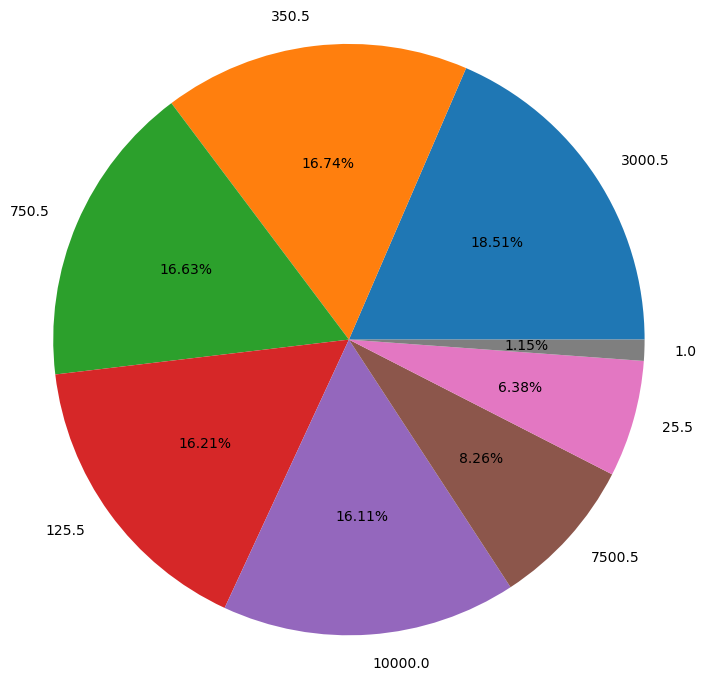

In [94]:
for i in catcol:
    data=gl[i].value_counts()
    ke=data.keys()
    va=data.values
    plt.pie(va,labels=ke,autopct='%0.2f%%',radius=2)
    plt.show()

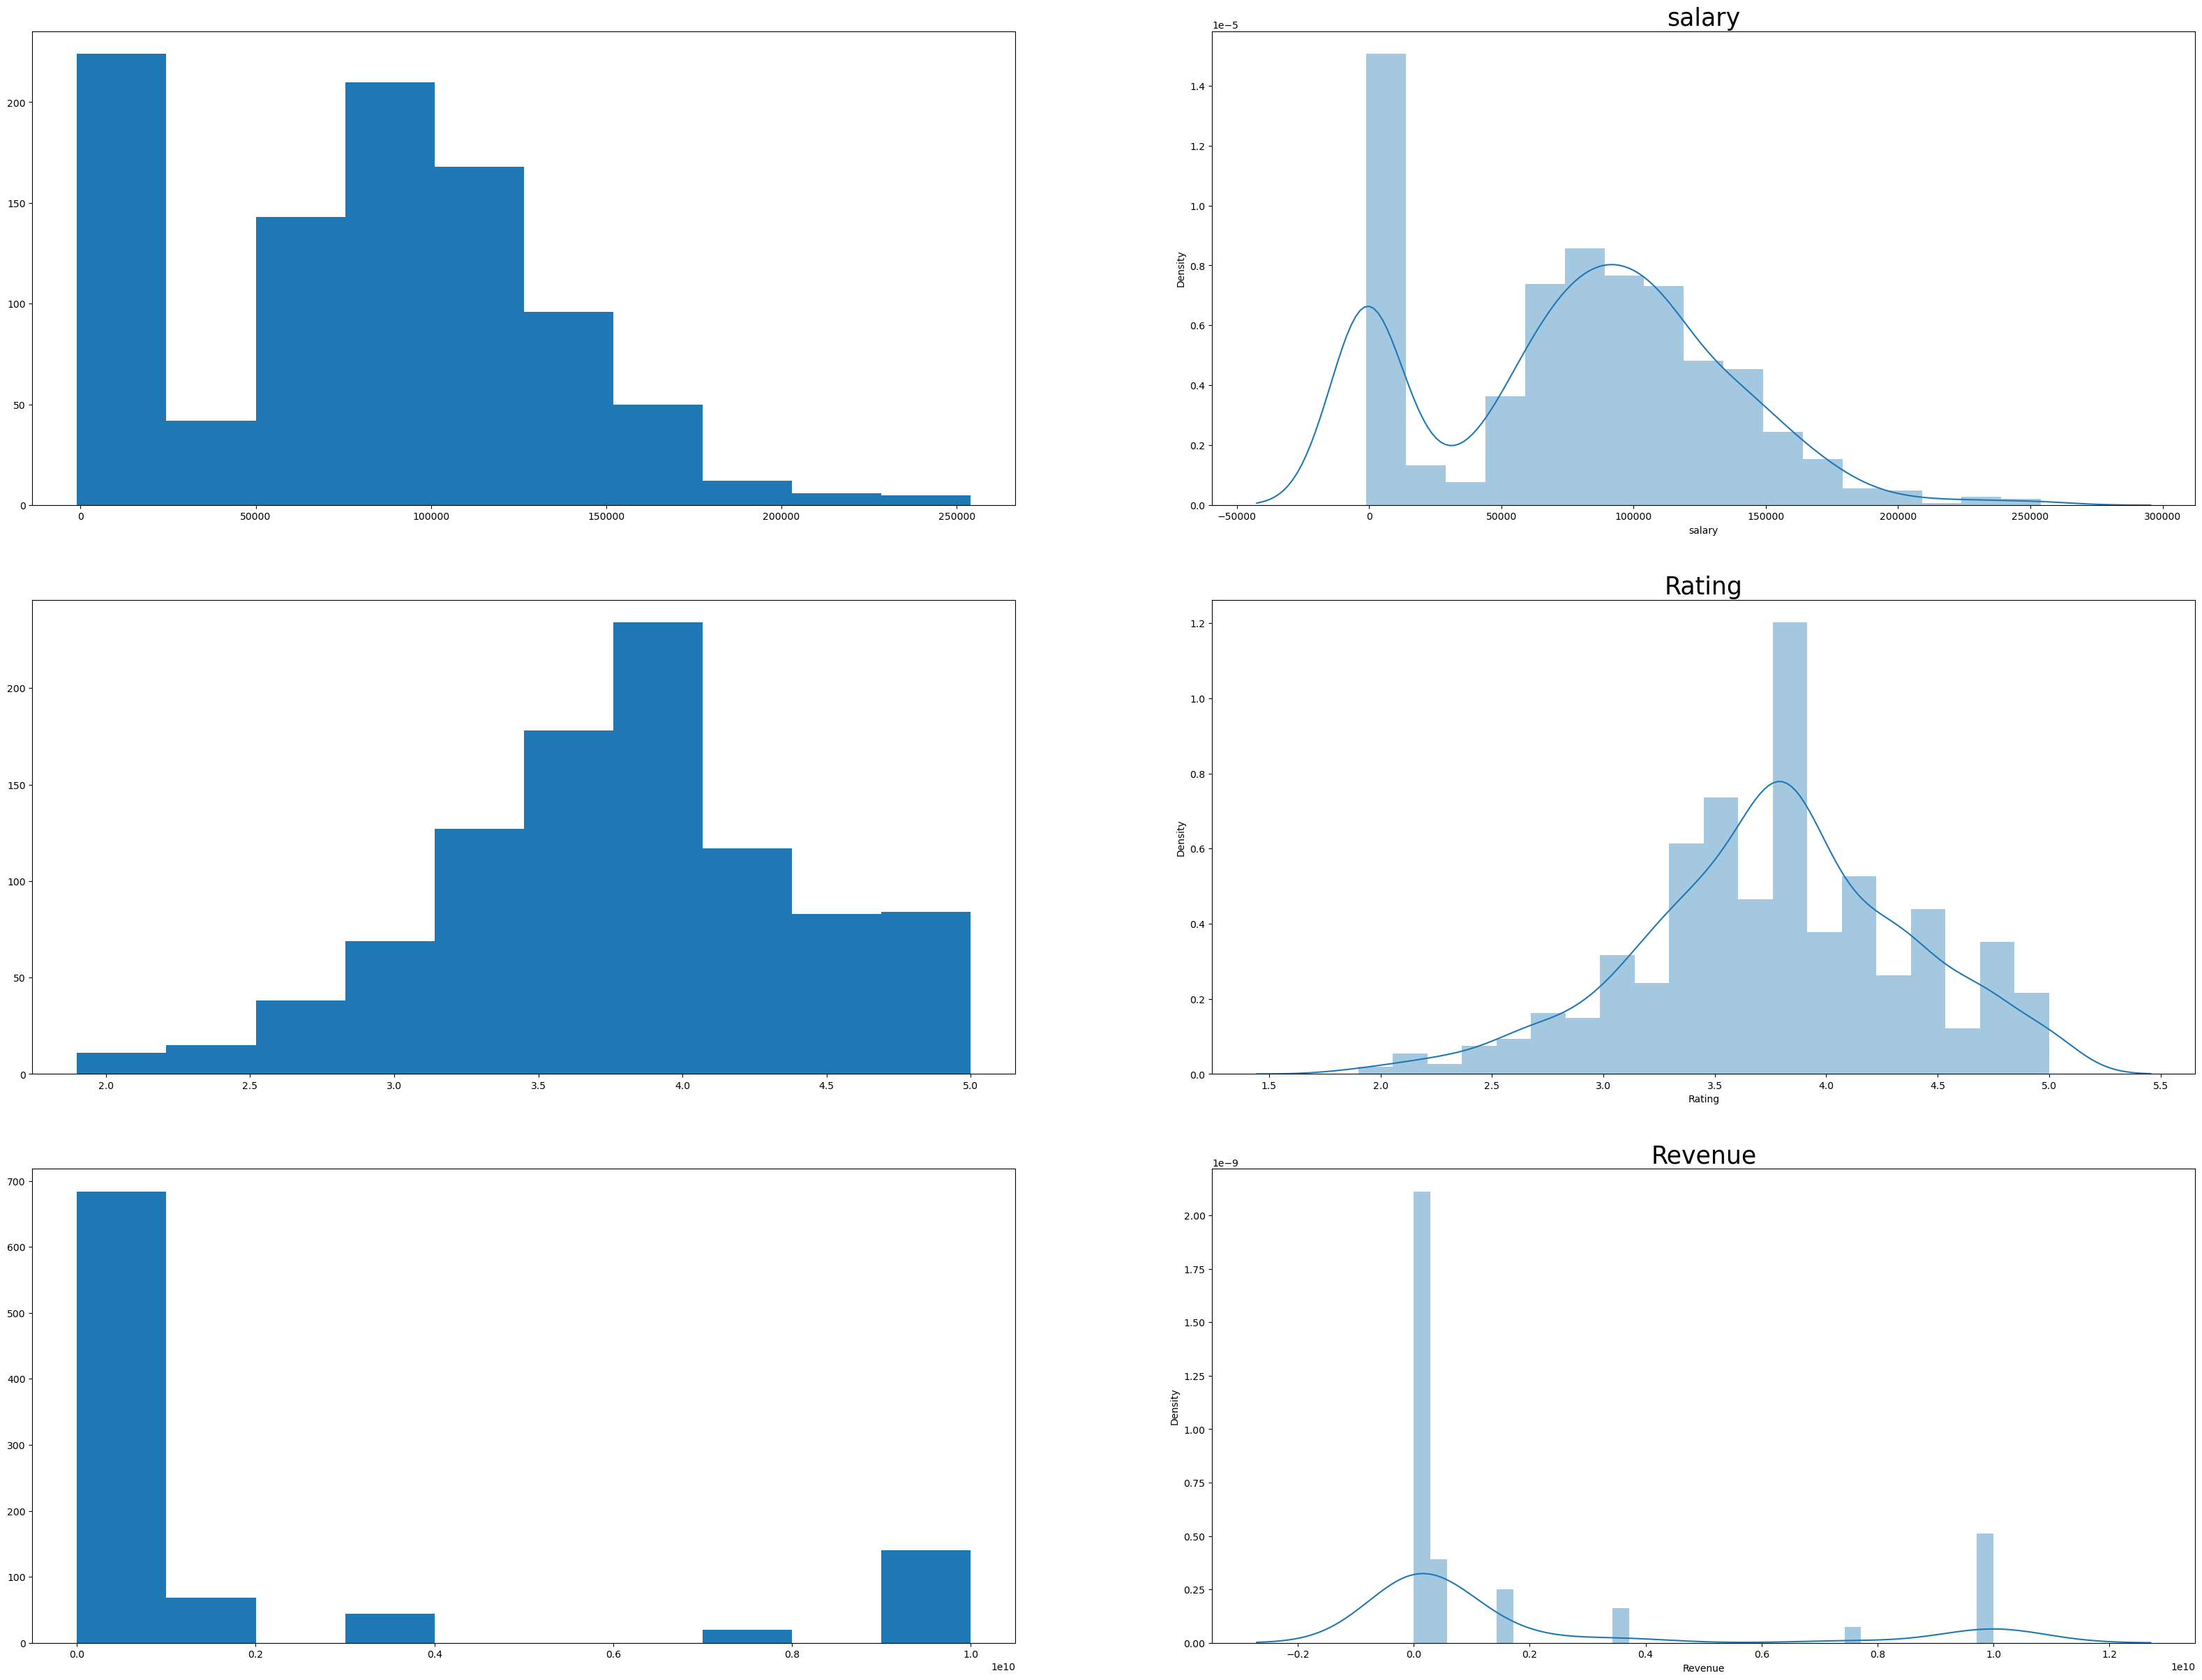

In [95]:
plt.figure(figsize=(40,30))
j=1
for i in numcol:
    plt.subplot(3,2,j)
    plt.hist(gll[i])
    j+=1
    plt.subplot(3,2,j)
    j+=1
    sns.distplot(gll[i],kde=True,hist=True)
    plt.title(i,fontsize=25)
plt.show()

### outlier analysis

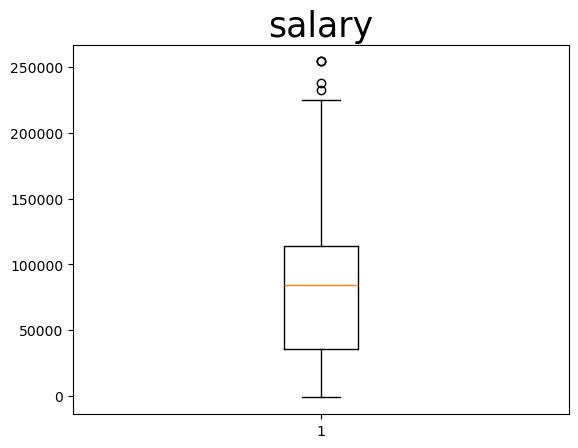

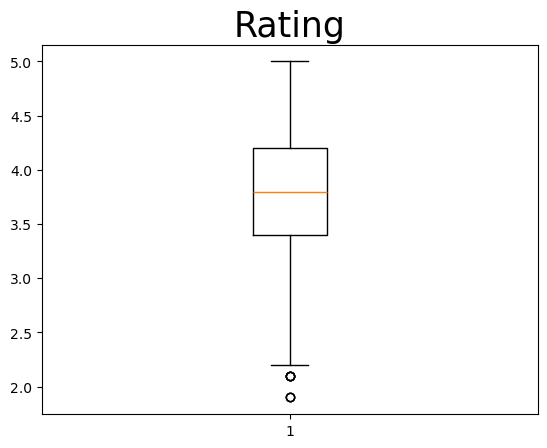

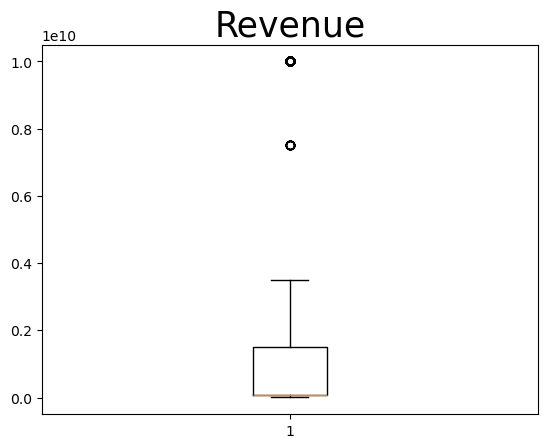

In [96]:
for i in numcol:
    plt.boxplot(gll[i])
    plt.title(i,fontsize=25)
    plt.show()

In [97]:
numcol2=[]
for i in numcol:
    a=f'{i}_c2'
    numcol2.append(a)
    

In [98]:
k=0
for i in numcol:
    data=gll[i]
    l=[]
    q1=np.percentile(data,25)
    q2=np.percentile(data,50)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    for j in gll[i]:
        if j<lb or j>ub:
            l.append(data.median())
        else:
            l.append(j)
    gll[numcol2[k]]=l
    k+=1

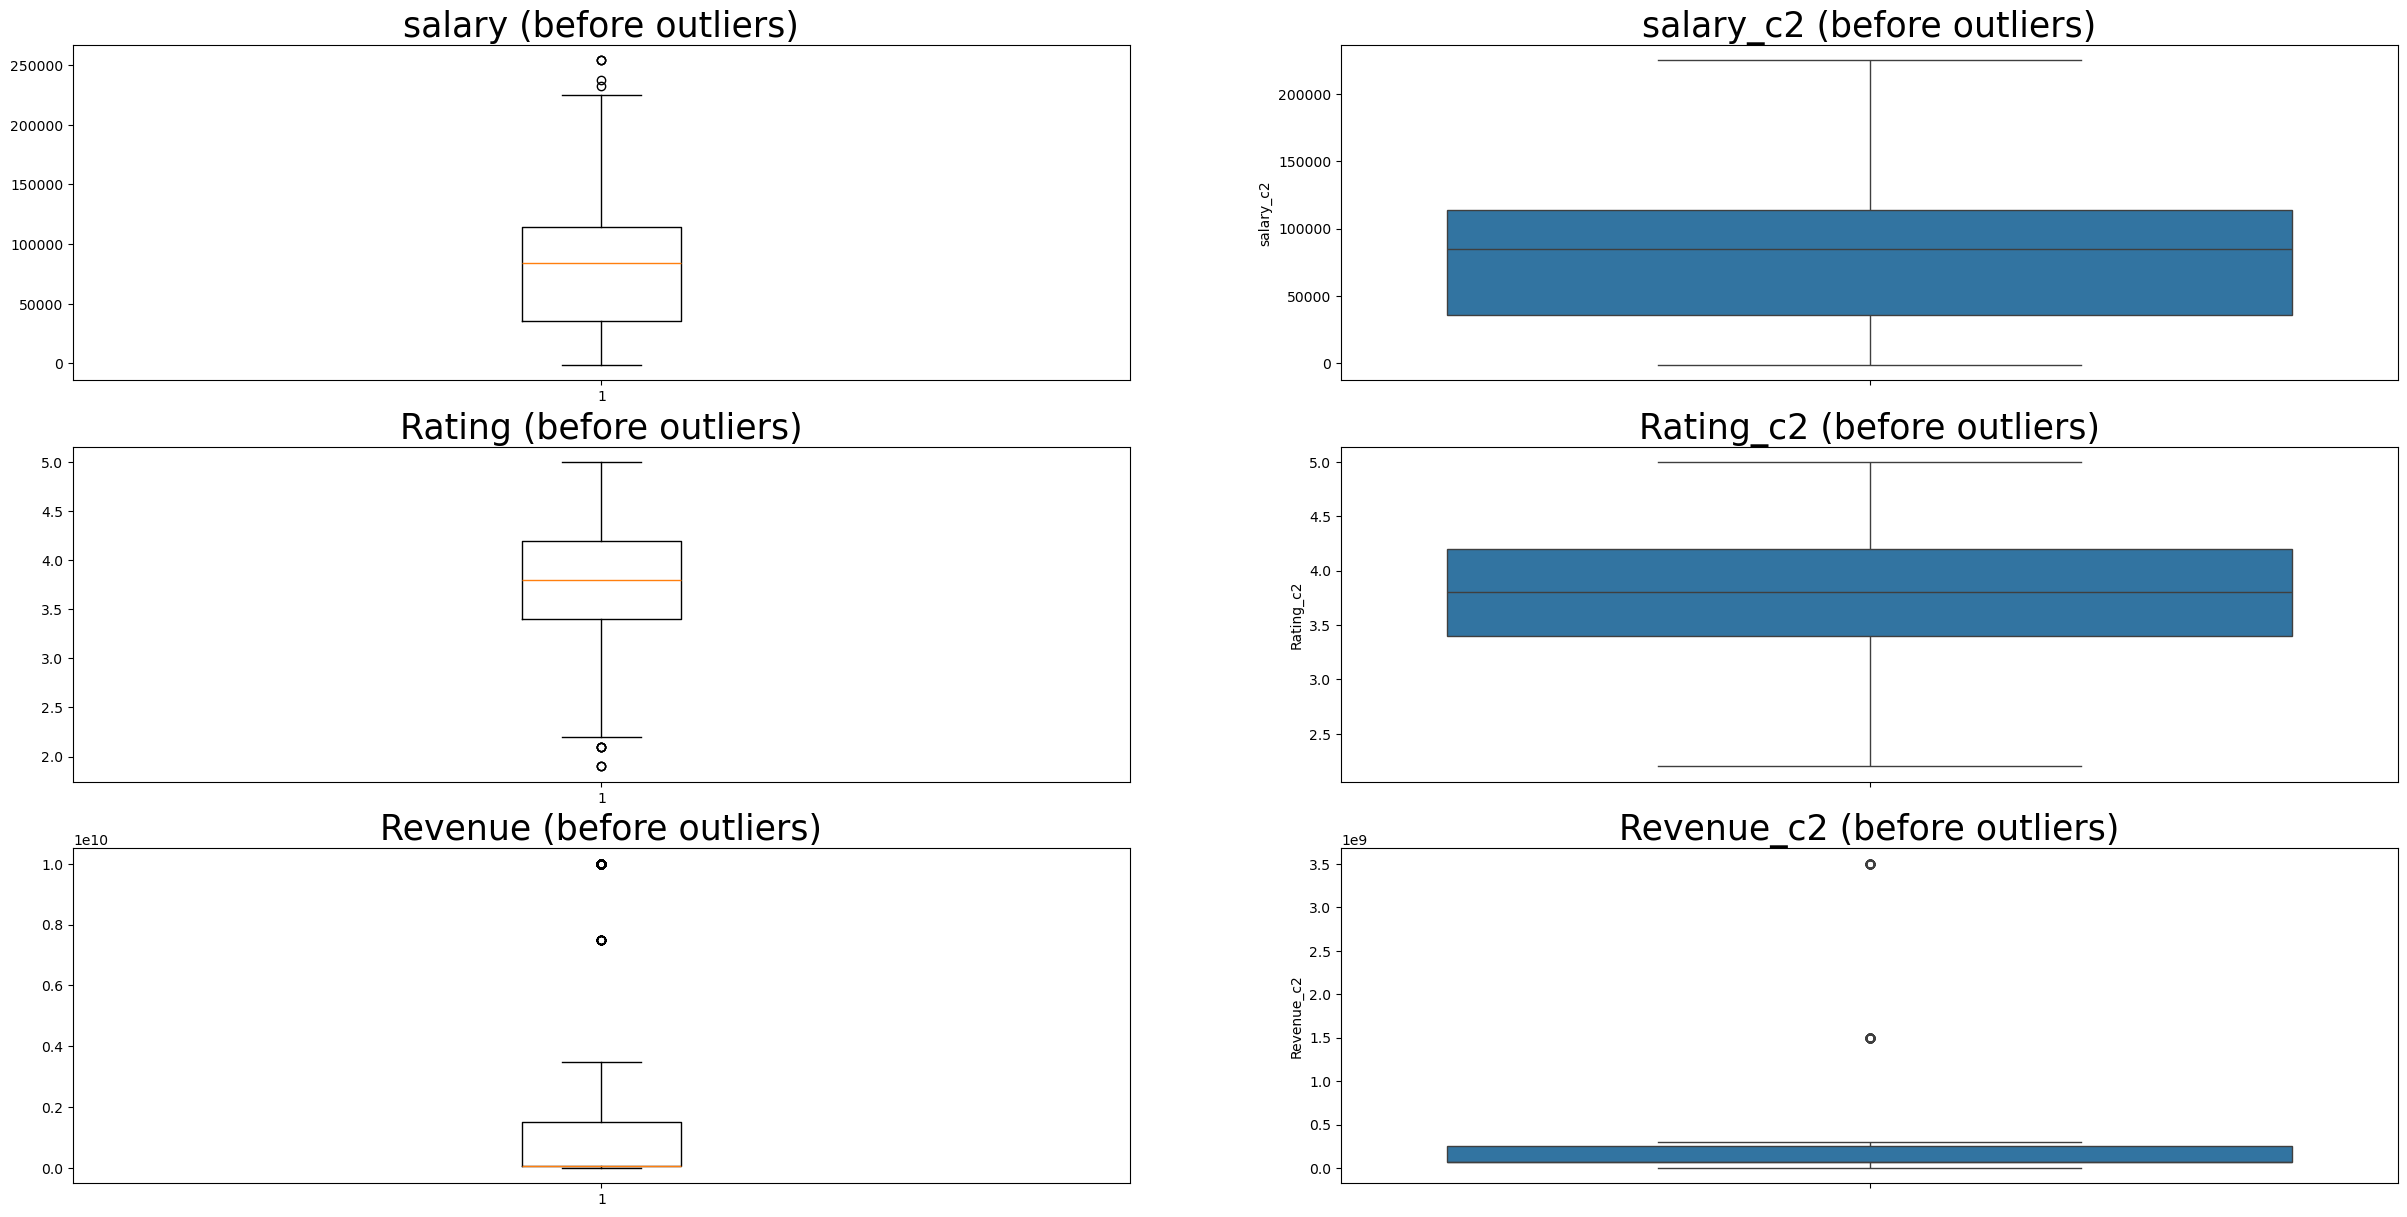

In [99]:
j = 1
plt.figure(figsize=(30, 20))

for i in range(len(numcol)):
    plt.subplot(4, 2, j)
    plt.title(f"{numcol[i]} (before outliers)", fontsize=25) 
    plt.boxplot(gll[numcol[i]])
    j += 1
    plt.subplot(4, 2, j)
    plt.title(f"{numcol2[i]} (before outliers)", fontsize=25) 
    sns.boxplot(data=gll[numcol2[i]]) 
    j += 1 
plt.show()


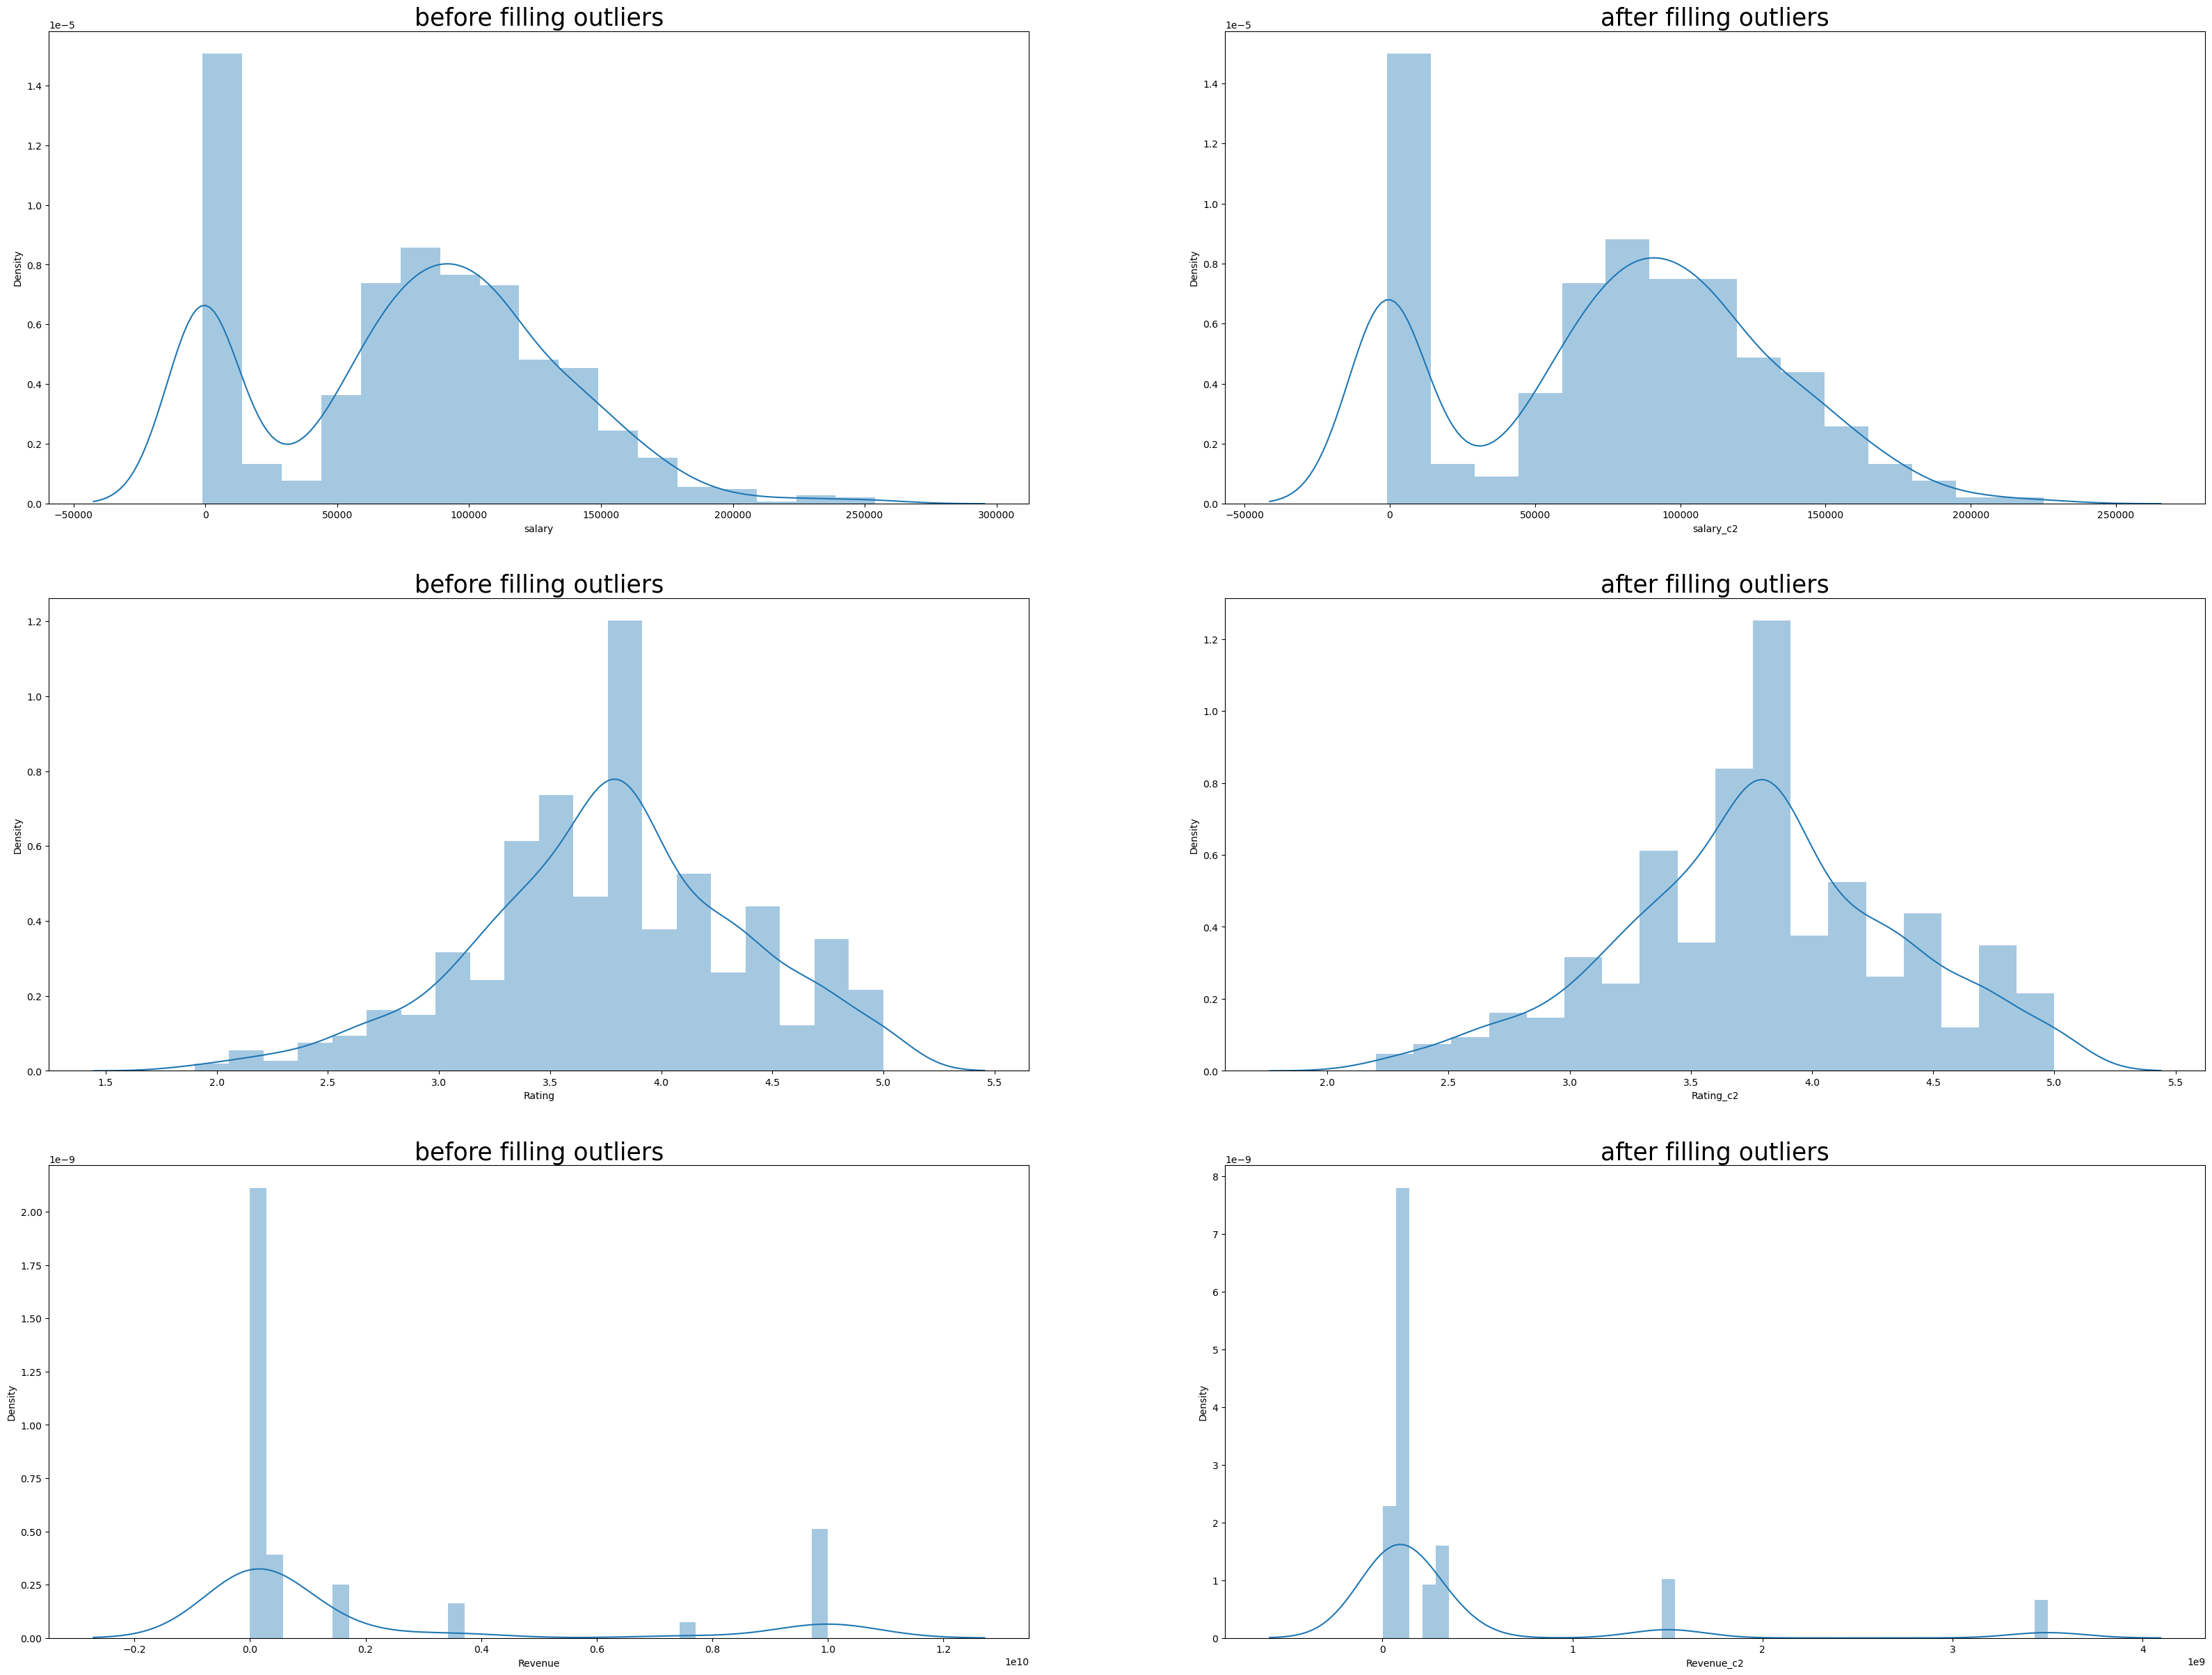

In [100]:
plt.figure(figsize=(40,30))
j=1
for i in range(len(numcol)):
    plt.subplot(3,2,j)
    plt.title(f"before filling outliers",fontsize=25)
    sns.distplot(gll[numcol[i]],kde=True,hist=True)
    j+=1
    plt.subplot(3,2,j)
    j+=1
    plt.title(f"after filling outliers",fontsize=25)
    sns.distplot(gll[numcol2[i]],kde=True,hist=True)
plt.show()

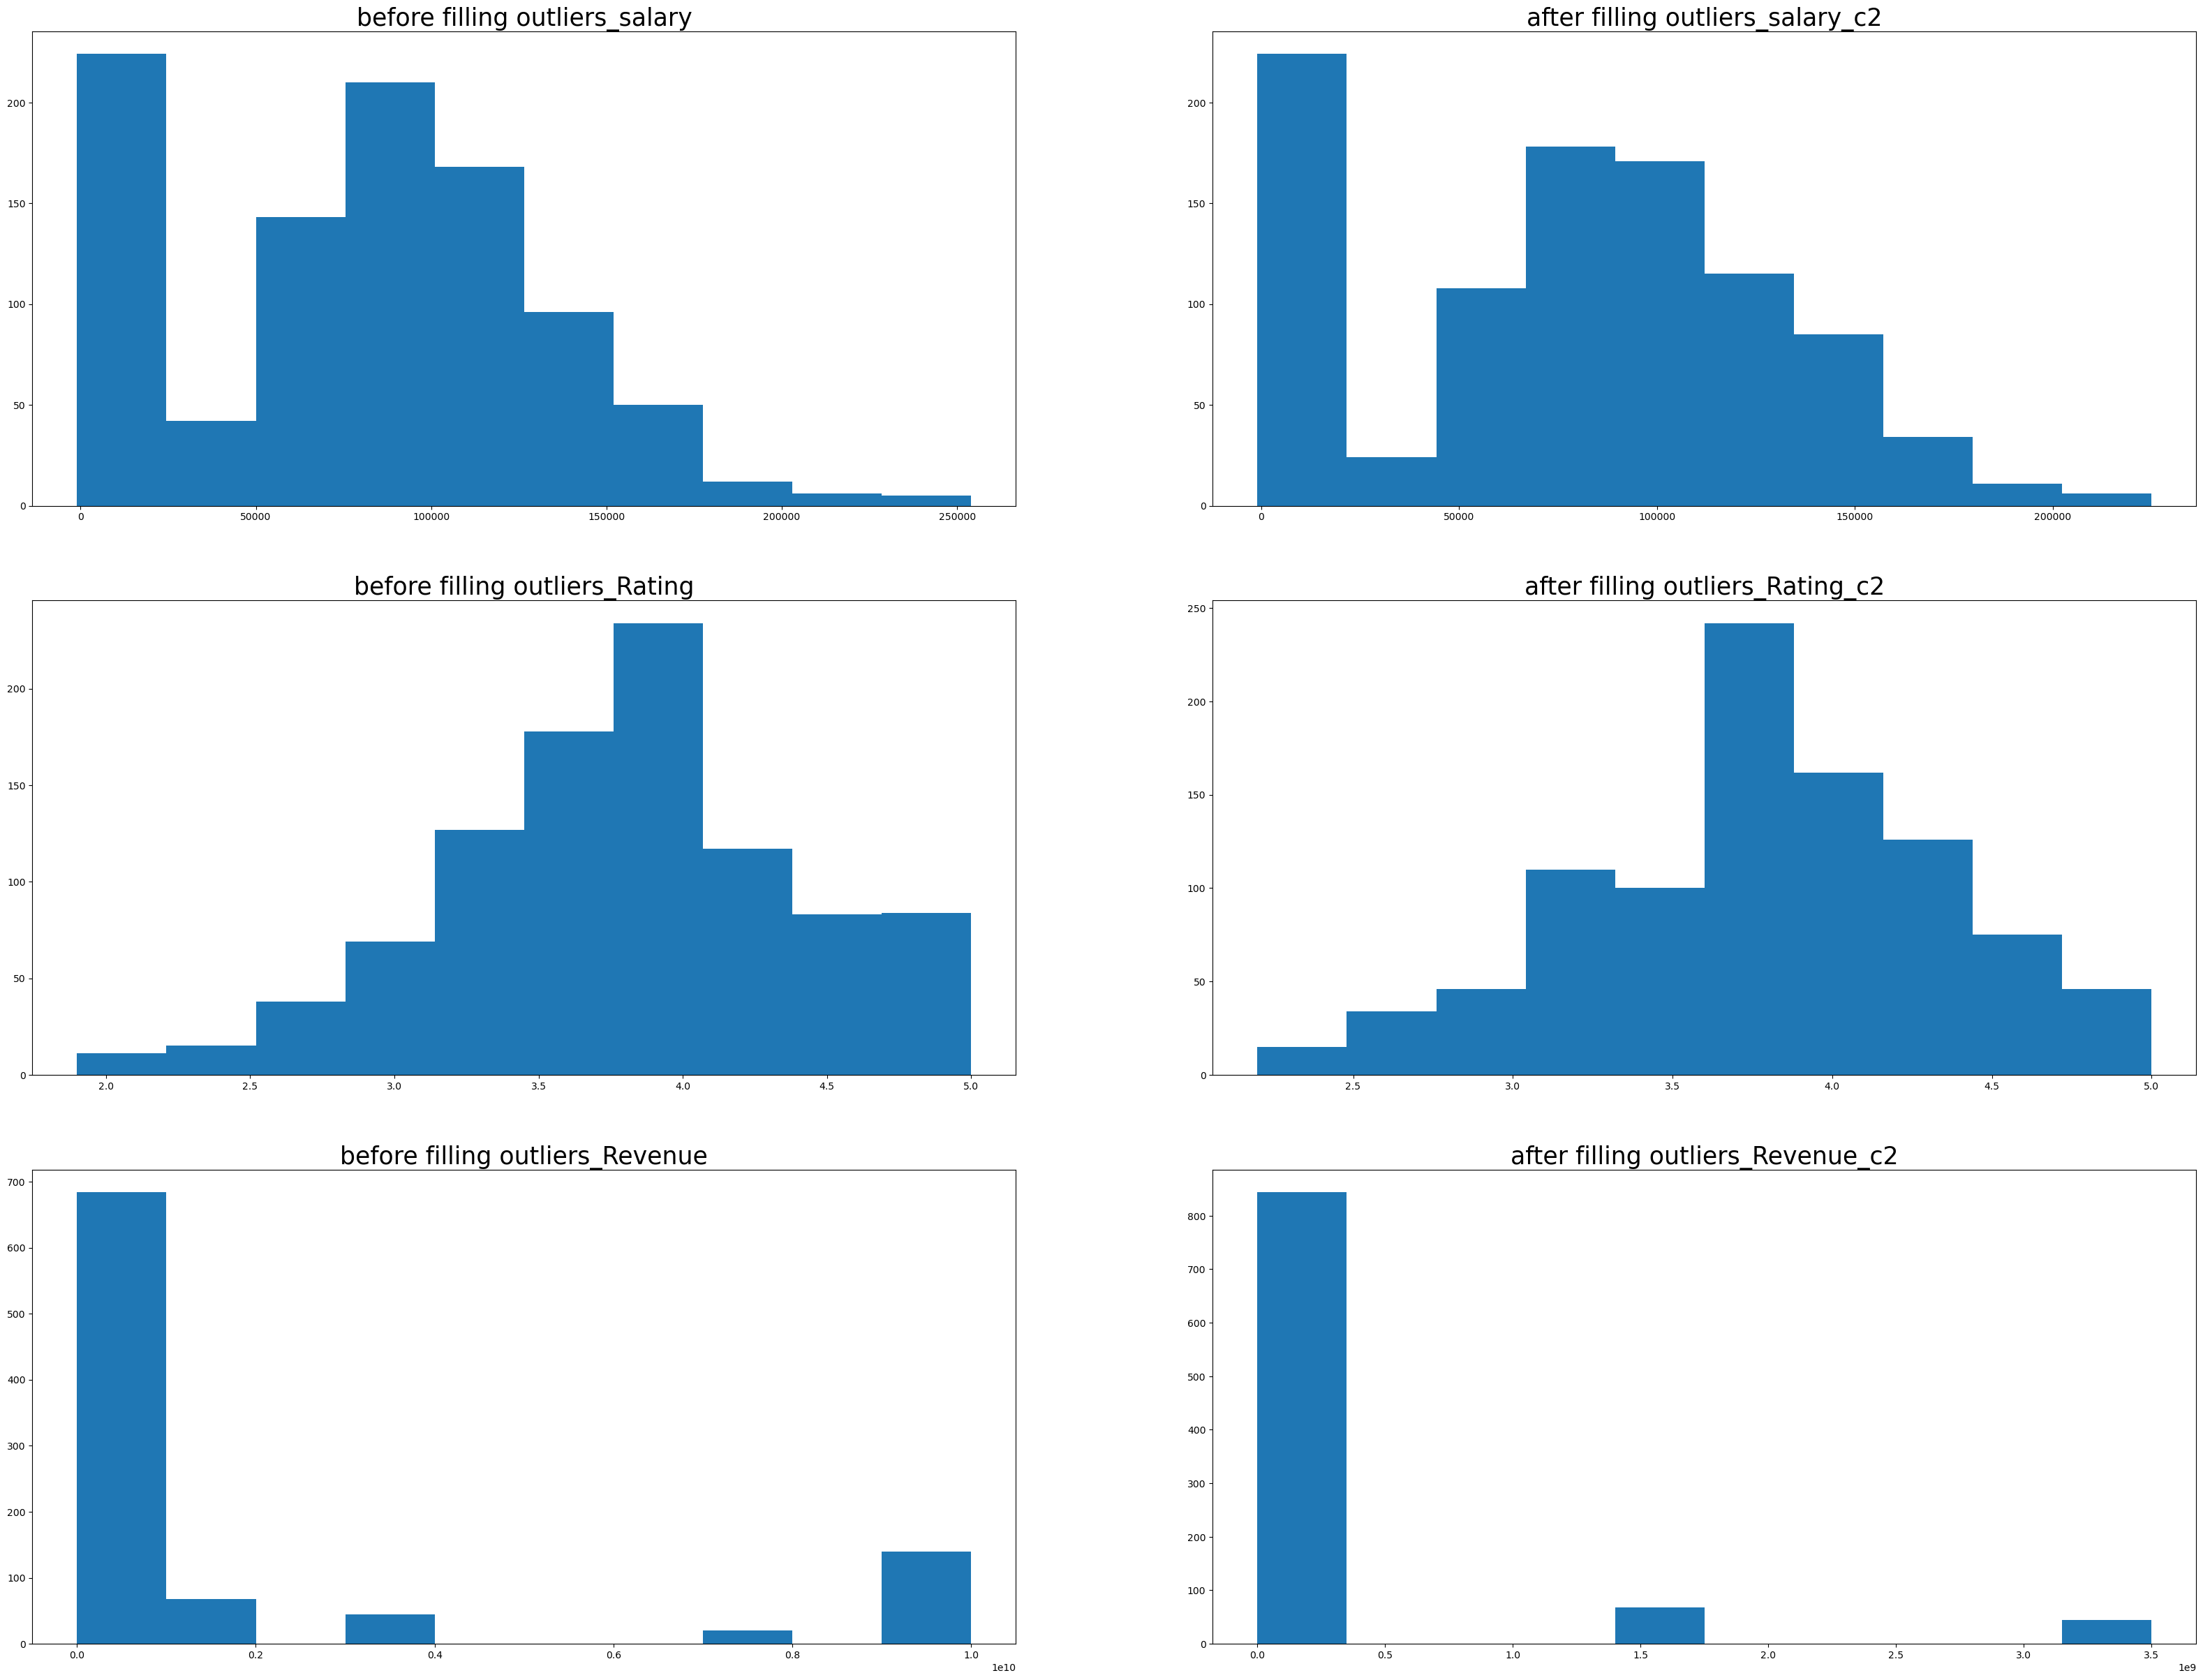

In [101]:
plt.figure(figsize=(40,30))
j=1
for i in range(len(numcol)):
    plt.subplot(3,2,j)
    plt.title(f"before filling outliers_{numcol[i]}",fontsize=25)
    plt.hist(gll[numcol[i]])
    j+=1
    plt.subplot(3,2,j)
    j+=1
    plt.title(f"after filling outliers_{numcol2[i]}",fontsize=25)
    plt.hist(gll[numcol2[i]])
    
plt.show()

### cross_tab

<Axes: xlabel='domain'>

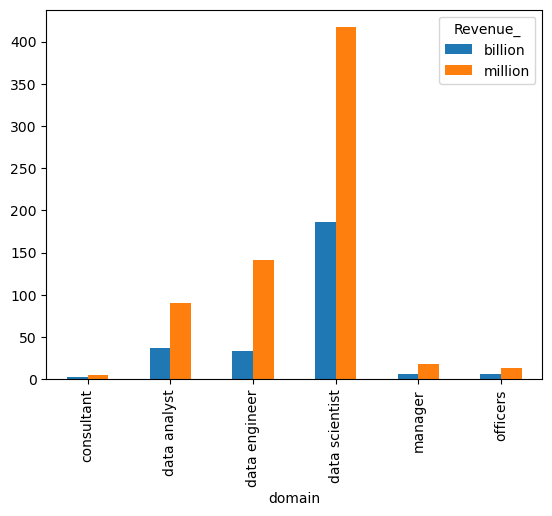

In [102]:
c1=gll['domain']
c2=gll['Revenue_']
df=pd.crosstab(c1,c2)
df.plot(kind='bar')

<Axes: xlabel='domain'>

<Figure size 5000x3000 with 0 Axes>

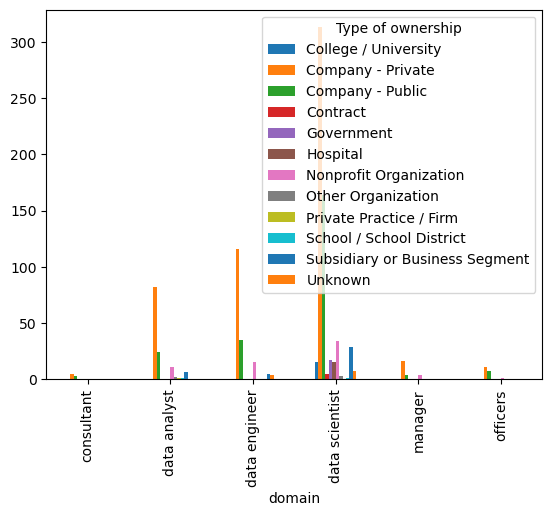

In [103]:
plt.figure(figsize=(50,30))
c1=gll['domain']
c3=gll['Type of ownership']
df=pd.crosstab(c1,c3)
df.plot(kind='bar')

<Axes: xlabel='Revenue_'>

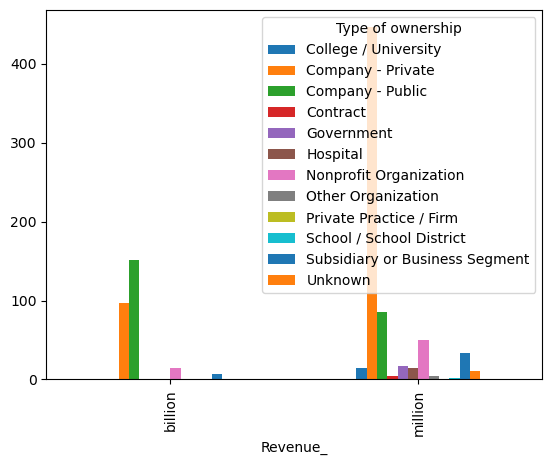

In [104]:
c1=gll['Revenue_']
c3=gll['Type of ownership']
df=pd.crosstab(c1,c3)
df.plot(kind='bar')

<Axes: xlabel='Sector'>

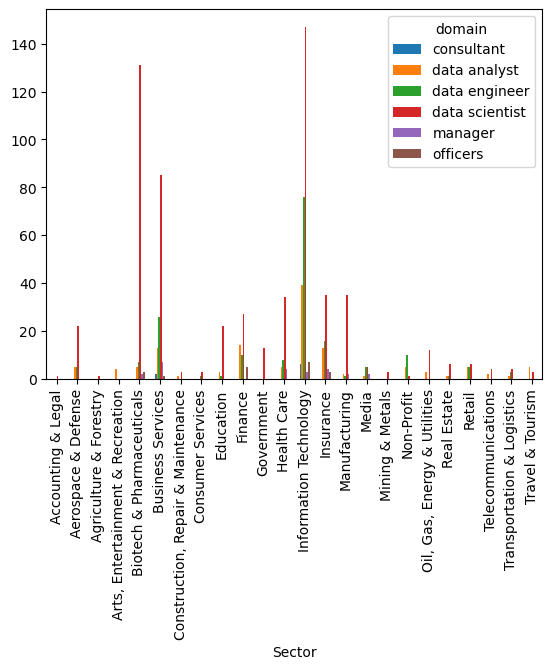

In [105]:
c1=gll['Sector']
c3=gll['domain']
df=pd.crosstab(c1,c3)
df.plot(kind='bar')

In [106]:
gll.drop(['salary','Rating','Revenue'],axis=1,inplace=True)

In [107]:
gll.describe()

,salary_c2,Rating_c2,Revenue_c2
count,956.000000,956.00000,9.560000e+02
mean,77030.334728,3.78682,3.618760e+08
std,53085.480018,0.57657,7.815686e+08
min,-1000.000000,2.20000,1.000000e+06
25%,35625.000000,3.40000,7.500000e+07
50%,84500.000000,3.80000,7.500000e+07
75%,113500.000000,4.20000,2.505000e+08
max,225000.000000,5.00000,3.500000e+09


# heatmap 
- by this we can understand the relation between two numeric columns

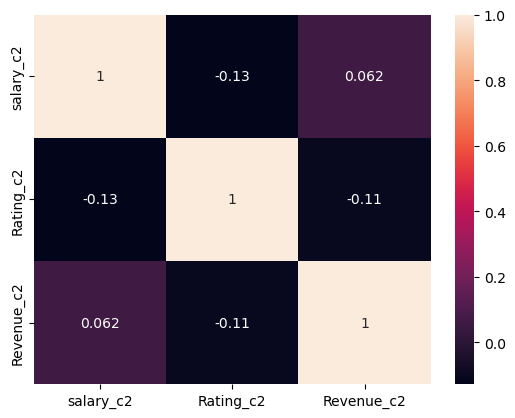

In [108]:
numcorr=gll.corr(numeric_only=True)
sns.heatmap(numcorr,annot=True)
plt.show()

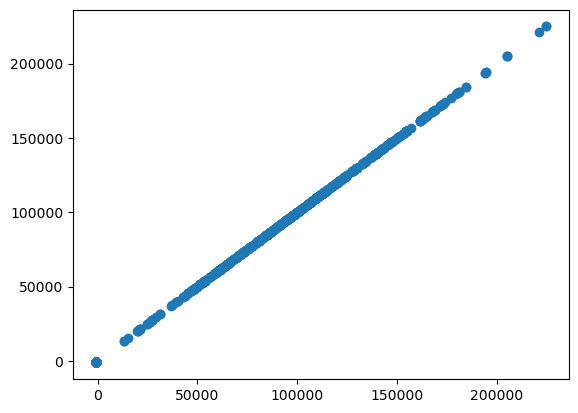

In [109]:
plt.scatter(gll['salary_c2'],gll['salary_c2'])

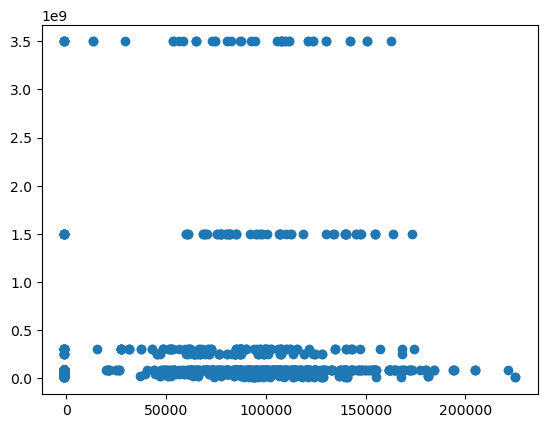

In [110]:
plt.scatter(gll['salary_c2'],gll['Revenue_c2'])

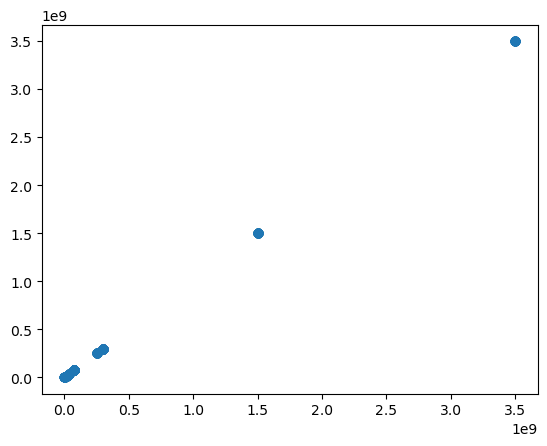

In [111]:
plt.scatter(gll['Revenue_c2'],gll['Revenue_c2'])

# label encoder
- converts categorical column to numerical column

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le=LabelEncoder()

In [114]:
gll.head()

,domain,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Competitors,Revenue_,salary_c2,Rating_c2,Revenue_c2
0,data scientist,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,"['Systems & Technology Research', 'Centauri', ...",million,72000.0,3.8,7.500000e+07
1,data scientist,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care,"['Rochester Regional Health', 'Nurx', 'Boys To...",billion,87500.0,3.4,3.500000e+09
2,data scientist,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Business Services,"['Affinity Solutions', 'Logic20/20', 'ManTech'...",million,85000.0,4.8,3.000000e+08
3,data scientist,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,"Oil, Gas, Energy & Utilities","['Pacific Northwest National Laboratory', 'Ass...",million,76500.0,3.8,2.505000e+08
4,data scientist,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Business Services,"['Logic20/20', 'ManTech', 'Yesler', 'Anson McC...",million,114500.0,2.9,7.500000e+07


In [115]:
gll.to_csv("before_label_encoder.csv",index=False)

In [116]:
catcol=gll.select_dtypes(include='object').columns
numcol=gll.select_dtypes(exclude='object').columns

In [117]:
for i in catcol:
    gll[i]=le.fit_transform(gll[i])

In [118]:
gll.head()

,domain,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Competitors,Revenue_,salary_c2,Rating_c2,Revenue_c2
0,3,389,3,85,4,62,1,1,249,1,72000.0,3.8,7.500000e+07
1,3,418,120,15,7,73,7,11,227,0,87500.0,3.4,3.500000e+09
2,3,215,50,53,4,99,1,5,38,1,85000.0,4.8,3.000000e+08
3,3,288,183,178,5,54,4,18,211,1,76500.0,3.8,2.505000e+08
4,3,14,147,139,2,87,1,5,207,1,114500.0,2.9,7.500000e+07


# minmax scalar
- min max scalar converts numcol values into 0 to 1 scale value

In [119]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in numcol:
    gll[i]=mm.fit_transform(gll[[i]])

In [120]:
gll.head()

,domain,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Sector,Competitors,Revenue_,salary_c2,Rating_c2,Revenue_c2
0,3,389,3,85,4,62,1,1,249,1,0.323009,0.571429,0.021149
1,3,418,120,15,7,73,7,11,227,0,0.391593,0.428571,1.000000
2,3,215,50,53,4,99,1,5,38,1,0.380531,0.928571,0.085453
3,3,288,183,178,5,54,4,18,211,1,0.342920,0.571429,0.071306
4,3,14,147,139,2,87,1,5,207,1,0.511062,0.250000,0.021149


In [126]:
gl

,domain,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Revenue_
0,data scientist,72.0,3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",750.5,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,7.500000e+07,"[Systems & Technology Research, Centauri, Torc...",million
1,data scientist,87.5,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000.0,1984,Other Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,"[Rochester Regional Health, Nurx, Boys Town Ho...",billion
2,data scientist,85.0,4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",750.5,2010,Company - Private,Security Services,Business Services,3.000000e+08,"[Affinity Solutions, Logic20/20, ManTech, Yesl...",million
3,data scientist,76.5,3.8,PNNL,"Richland, WA","Richland, WA",3000.5,1965,Government,Energy,"Oil, Gas, Energy & Utilities",2.505000e+08,"[Pacific Northwest National Laboratory, Associ...",million
4,data scientist,114.5,2.9,Affinity Solutions,"New York, NY","New York, NY",125.5,1998,Company - Private,Advertising & Marketing,Business Services,7.500000e+07,"[Logic20/20, ManTech, Yesler, Anson McCade, Zi...",million
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,data engineer,102.5,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",3000.5,2006,Company - Public,Internet,Information Technology,3.000000e+08,"[h2o.ai, Nuna, Porch, Novetta, Clarity Insight...",million
952,data scientist,73.5,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",750.5,1984,College / University,Colleges & Universities,Education,7.500000e+07,"[Teaching Strategies, LLC, National Student Cl...",million
953,data scientist,127.5,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",25.5,-1,Company - Private,Staffing & Outsourcing,Business Services,7.500000e+06,"[Affinity Solutions, Logic20/20, ManTech, Yesl...",million
954,data engineer,-1.0,4.8,IGNW,"Austin, TX","Portland, OR",350.5,2015,Company - Private,IT Services,Information Technology,3.750000e+07,"[h2o.ai, Nuna, Porch, Novetta, Clarity Insight...",million


In [121]:
gll.to_csv("final_model_build_glassdoor.csv",index=False)

In [123]:
gll.isnull().sum()

domain               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Sector               0
Competitors          0
Revenue_             0
salary_c2            0
Rating_c2            0
Revenue_c2           0
dtype: int64

In [124]:
gll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   domain             956 non-null    int32  
 1   Company Name       956 non-null    int32  
 2   Location           956 non-null    int32  
 3   Headquarters       956 non-null    int32  
 4   Size               956 non-null    int32  
 5   Founded            956 non-null    int32  
 6   Type of ownership  956 non-null    int32  
 7   Sector             956 non-null    int32  
 8   Competitors        956 non-null    int32  
 9   Revenue_           956 non-null    int32  
 10  salary_c2          956 non-null    float64
 11  Rating_c2          956 non-null    float64
 12  Revenue_c2         956 non-null    float64
dtypes: float64(3), int32(10)
memory usage: 59.9 KB


In [125]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   domain             956 non-null    object 
 1   Salary Estimate    956 non-null    float64
 2   Rating             956 non-null    float64
 3   Company Name       956 non-null    object 
 4   Location           956 non-null    object 
 5   Headquarters       956 non-null    object 
 6   Size               956 non-null    float64
 7   Founded            956 non-null    int64  
 8   Type of ownership  956 non-null    object 
 9   Industry           956 non-null    object 
 10  Sector             956 non-null    object 
 11  Revenue            956 non-null    float64
 12  Competitors        956 non-null    object 
 13  Revenue_           956 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 104.7+ KB
